## Q5

In [122]:
#reading training data from the file
from numpy import genfromtxt
my_data = genfromtxt('Digits/ZipDigits.train')

In [123]:
#renaming label '1' as '-1' and '5' as '1'
arr=[]
labels=[]
for row in my_data:
    
    if(row[0]-1==0):
        arr.append(row)
        arr[-1][0]=-1
        labels.append(-1)
    elif(row[0]-5==0):
        arr.append(row)
        arr[-1][0]=1
        labels.append(1)        

In [124]:
#calculating intensity and symmetry of each image
intensity=[]
symmetry=[]
for row in arr:
    whites=0
    value_sym=0
    a=17
    for x in range(1,257):
        if(row[x]==-1):
            whites+=1
    
    for y in range(1,257,16):
        for z in range(y,y+8):
            value_sym+=(row[z]-row[a-z])
        a+=16
    
    intensity.append((whites)/256)
    symmetry.append(value_sym)

In [125]:
#reading testing data from the file
test_data = genfromtxt('Digits/ZipDigits.test')
#renaming label '1' as '-1' and '5' as '1' for testing set
test_arr=[]
test_labels=[]
for row in test_data:
    
    if(row[0]-1==0):
        test_arr.append(row)
        test_arr[-1][0]=-1
        test_labels.append(-1)
    elif(row[0]-5==0):
        test_arr.append(row)
        test_arr[-1][0]=1
        test_labels.append(1)    
        
#calculating intensity and symmetry of each image for testing set
test_intensity=[]
test_symmetry=[]
for test_row in test_arr:
    test_whites=0
    test_value_sym=0
    test_a=17
    for x in range(1,257):
        if(test_row[x]==-1):
            test_whites+=1
    
    for y in range(1,257,16):
        for z in range(y,y+8):
            
            test_value_sym+=(test_row[z]-test_row[test_a-z])
        
        test_a+=16
    
    test_intensity.append((test_whites)/256)
    test_symmetry.append(test_value_sym)

In [126]:
import numpy as np
X=np.array([np.ones(len(intensity)), np.asarray(intensity), np.asarray(symmetry)])

In [127]:
y=np.asarray(labels)
y=y.reshape(1,len(labels))

In [128]:
test_X=np.array([np.ones(len(test_intensity)), np.asarray(test_intensity), np.asarray(test_symmetry)])
test_y=np.asarray(test_labels)
test_y=test_y.reshape(1,len(test_labels))

In [129]:
#no of neurons in hidden layer(excluding bias)
m = 10

In [130]:
#initializing weights
w1 = np.array([[0.1]*m]*3)
w1

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

In [131]:
#initializing weights
w2 = np.array([0.1]*(m+1))
w2=w2.reshape((m+1),1)
w2

array([[0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1]])

In [132]:
def forward(X,y,w1,w2,m):
    signal_layer1 = (w1.T).dot(X)
    lay=(m+1,y.size)
    output_layer1 = np.empty(lay)
    for i in range(y.size):
        output_layer1[0][i]=1
    for j in range(m):
        output_layer1[j+1]=np.tanh(signal_layer1[j])
    final_signal = (w2.T).dot(output_layer1)
    final_output = np.tanh(final_signal)
    return final_output,output_layer1,signal_layer1

In [133]:
def backward(X,y,final_output,w1,w2,output_layer1,signal_layer1):
    delta2 = 2*(y-final_output)*(1-(final_output*final_output))
    g=w2.dot(delta2)
    delta1= (1-(np.tanh(signal_layer1)*np.tanh(signal_layer1)))*(g[1:])
    d_w1=X.dot(delta1.T)
    d_w2=output_layer1.dot(delta2.T)
    return d_w1,d_w2

## 5.1 Vanilla Gradient Descent

In [134]:
#updating the weights using the gradients computed from 'backward' method and a learning rate of 0.01 
iterations=0
iters_vgd=[]
ein_vgd=[]
while(iterations<2000000):
    final_output,output_layer1,signal_layer1=forward(X,y,w1,w2,m)
    d_w1,d_w2=backward(X,y,final_output,w1,w2,output_layer1,signal_layer1)
    w1+=0.01*d_w1
    w2+=0.01*d_w2
    iterations+=1
    h=np.sign(final_output)
    error=0
    for i in range(y.size):
        if(y[0][i]-h[0][i]!=0):
            error+=1
    iters_vgd.append(iterations)
    ein_vgd.append(error/y.size)

In [135]:
#computing the output after learning on test set
signal_layer1 = (w1.T).dot(test_X)
lay=(m+1,test_y.size)
output_layer1 = np.empty(lay)
for i in range(test_y.size):
    output_layer1[0][i]=1
for j in range(m):
    output_layer1[j+1]=np.tanh(signal_layer1[j])
final_signal = (w2.T).dot(output_layer1)
final_output = np.tanh(final_signal)
h=np.sign(final_output)
test_error=0
for i in range(test_y.size):
    if(test_y[0][i]-h[0][i]!=0):
        test_error+=1
test_error_vgd=test_error/test_y.size

## 5.2 Stochastic Gradient Descent

In [136]:
#initializing weights
w1 = np.array([[0.1]*m]*3)
w2 = np.array([0.1]*(m+1))
w2=w2.reshape((m+1),1)

In [137]:
#updating the weights using the gradients computed from 'backward' method and a learning rate of 0.01 
iterations=0
iters_sgd=[]
ein_sgd=[]
lay=(3,1)
temp=np.empty(lay)
while(iterations<2000000): 
    i=np.random.randint(0, y.size-1) 
    temp[0]=X[0][i]
    temp[1]=X[1][i]
    temp[2]=X[2][i]
    temp_y=y[0][i]
    temp_y=temp_y.reshape(1,1)
    final_output,output_layer1,signal_layer1=forward(temp,temp_y,w1,w2,m)
    d_w1,d_w2=backward(temp,temp_y,final_output,w1,w2,output_layer1,signal_layer1)
    w1+=0.01*d_w1
    w2+=0.01*d_w2
    iterations+=1
    #computing the output after learning
    signal_layer1 = (w1.T).dot(X)
    lay=(m+1,y.size)
    output_layer1 = np.empty(lay)
    for i in range(y.size):
        output_layer1[0][i]=1
    for j in range(m):
        output_layer1[j+1]=np.tanh(signal_layer1[j])
    final_signal = (w2.T).dot(output_layer1)
    final_output = np.tanh(final_signal)
    h=np.sign(final_output)
    error=0
    for i in range(y.size):
        if(y[0][i]-h[0][i]!=0):
            error+=1
    iters_sgd.append(iterations)
    ein_sgd.append(error/y.size)

In [138]:
#computing the output after learning on test set
signal_layer1 = (w1.T).dot(test_X)
lay=(m+1,test_y.size)
output_layer1 = np.empty(lay)
for i in range(test_y.size):
    output_layer1[0][i]=1
for j in range(m):
    output_layer1[j+1]=np.tanh(signal_layer1[j])
final_signal = (w2.T).dot(output_layer1)
final_output = np.tanh(final_signal)
h=np.sign(final_output)
test_error=0
for i in range(test_y.size):
    if(test_y[0][i]-h[0][i]!=0):
        test_error+=1
test_error_sgd=test_error/test_y.size

## 5.3 Mini-batch Gradient Descent

In [139]:
#initializing weights
w1 = np.array([[0.1]*m]*3)
w2 = np.array([0.1]*(m+1))
w2=w2.reshape((m+1),1)

In [141]:
#updating the weights using the gradients computed from 'backward' method and a learning rate of 0.01 
iterations=0
iters_mbgd=[]
ein_mbgd=[]
while(iterations<2000000):
    p=(3,32)
    mbgd_X=np.empty(p)
    mbgd_y=np.empty(32)
    mbgd_y=mbgd_y.reshape(1,32)
    for k in range(32):
        index=np.random.randint(0, y.size-1) 
        mbgd_X[0][k]=X[0][index]
        mbgd_X[1][k]=X[1][index]
        mbgd_X[2][k]=X[2][index]
        mbgd_y[0][k]=y[0][index]
        
    final_output,output_layer1,signal_layer1=forward(mbgd_X,mbgd_y,w1,w2,m)
    d_w1,d_w2=backward(mbgd_X,mbgd_y,final_output,w1,w2,output_layer1,signal_layer1)
    w1+=0.01*d_w1
    w2+=0.01*d_w2
    iterations+=1
    #computing the output after learning
    signal_layer1 = (w1.T).dot(X)
    lay=(m+1,y.size)
    output_layer1 = np.empty(lay)
    for i in range(y.size):
        output_layer1[0][i]=1
    for j in range(m):
        output_layer1[j+1]=np.tanh(signal_layer1[j])
    final_signal = (w2.T).dot(output_layer1)
    final_output = np.tanh(final_signal)
    h=np.sign(final_output)
    error=0
    for i in range(y.size):
        if(y[0][i]-h[0][i]!=0):
            error+=1
    iters_mbgd.append(iterations)
    ein_mbgd.append(error/y.size)

In [142]:
#computing the output after learning on test set
signal_layer1 = (w1.T).dot(test_X)
lay=(m+1,test_y.size)
output_layer1 = np.empty(lay)
for i in range(test_y.size):
    output_layer1[0][i]=1
for j in range(m):
    output_layer1[j+1]=np.tanh(signal_layer1[j])
final_signal = (w2.T).dot(output_layer1)
final_output = np.tanh(final_signal)
h=np.sign(final_output)
test_error=0
for i in range(test_y.size):
    if(test_y[0][i]-h[0][i]!=0):
        test_error+=1
test_error_mbgd=test_error/test_y.size

## 5.4

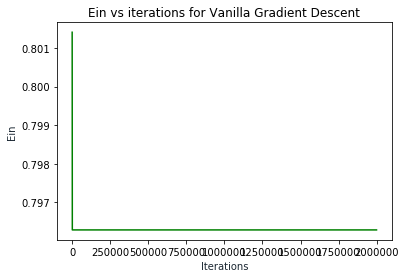

In [167]:
import matplotlib.pyplot as plt
vgd_iters=[]
vgd_ein=[]
for i in range(0,len(iters_vgd),1000):
    vgd_iters.append(iters_vgd[i])
    vgd_ein.append(ein_vgd[i])
plt.plot(vgd_iters, vgd_ein, color='green')
plt.title('Ein vs iterations for Vanilla Gradient Descent')
plt.xlabel('Iterations', color='#1C2833')
plt.ylabel('Ein', color='#1C2833')
plt.show()

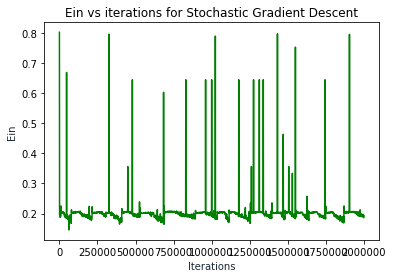

In [166]:
sgd_iters=[]
sgd_ein=[]
for i in range(0,len(iters_sgd),1000):
    sgd_iters.append(iters_sgd[i])
    sgd_ein.append(ein_sgd[i])
plt.plot(sgd_iters, sgd_ein, color='green')
plt.title('Ein vs iterations for Stochastic Gradient Descent')
plt.xlabel('Iterations', color='#1C2833')
plt.ylabel('Ein', color='#1C2833')
plt.show()

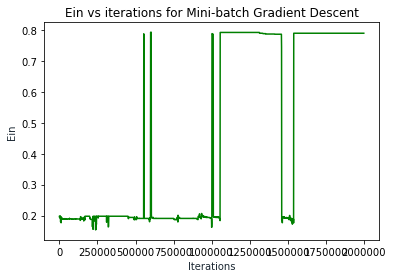

In [169]:
mbgd_iters=[]
mbgd_ein=[]
for i in range(0,len(iters_mbgd),1000):
    mbgd_iters.append(iters_mbgd[i])
    mbgd_ein.append(ein_mbgd[i])
plt.plot(mbgd_iters, mbgd_ein, color='green')
plt.title('Ein vs iterations for Mini-batch Gradient Descent')
plt.xlabel('Iterations', color='#1C2833')
plt.ylabel('Ein', color='#1C2833')
plt.show()

## 5.5

In [170]:
print("Test error with weights computed using Vanilla Gradient Descent after 2000000 iterations: ", test_error_vgd)
print("Test error with weights computed using Stochastic Gradient Descent after 2000000 iterations: ", test_error_sgd)
print("Test error with weights computed using Mini-batch Gradient Descent after 2000000 iterations: ", test_error_mbgd)

Test error with weights computed using Vanilla Gradient Descent after 2000000 iterations:  0.7735849056603774
Test error with weights computed using Stochastic Gradient Descent after 2000000 iterations:  0.20047169811320756
Test error with weights computed using Mini-batch Gradient Descent after 2000000 iterations:  0.7688679245283019
